### 이륜차 신고현황 (2017~2021)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
# 데이터 불러오기
file_path = './minidata/이륜차신고현황_연도별.csv'
df = pd.read_csv(file_path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   년(Annual)  75 non-null     int64 
 1   LEVEL1     75 non-null     object
 2   LEVEL2     75 non-null     object
 3   값          75 non-null     int64 
 4   증감         75 non-null     int64 
 5   증감율        75 non-null     int64 
 6   구성비        75 non-null     int64 
 7   누계         75 non-null     int64 
 8   누계구성비      75 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 5.4+ KB


In [4]:
df.columns

Index(['년(Annual)', 'LEVEL1', 'LEVEL2', '값', '증감', '증감율', '구성비', '누계',
       '누계구성비'],
      dtype='object')

In [5]:
# 필요부분 필터링
data = df[(df['LEVEL1'] == '계')&(df['LEVEL2'] == '소계')]

In [6]:
data

,년(Annual),LEVEL1,LEVEL2,값,증감,증감율,구성비,누계,누계구성비
0,2017,계,소계,2196475,2196475,2196475,0,0,0
15,2018,계,소계,2208424,2208424,2208424,0,0,0
30,2019,계,소계,2236895,2236895,2236895,0,0,0
45,2020,계,소계,2289009,2289009,2289009,0,0,0
60,2021,계,소계,2213837,2213837,2213837,0,0,0


In [7]:
data = data[['년(Annual)','값']].reset_index(drop=True)

In [8]:
# 컬럼명 변경
data.columns = ['년', '이륜차 신고 수']

In [9]:
data.set_index('년', inplace=True)

In [10]:
data

,이륜차 신고 수
년,
2017,2196475
2018,2208424
2019,2236895
2020,2289009
2021,2213837


C:\Users\admin\AppData\Local\Temp\ipykernel_4772\4122469484.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


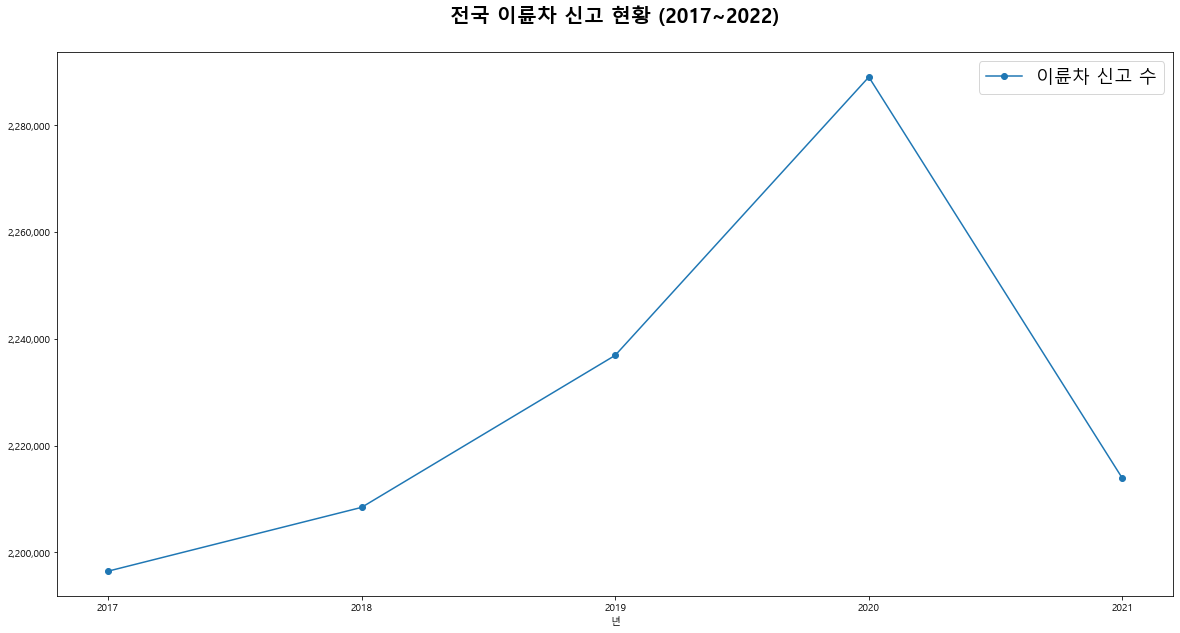

In [12]:
# 시각화
plt.rc('font', family = 'Malgun Gothic', size = 10)

plt.rcParams['figure.figsize'] = (20,10)
data.plot(kind='line', marker = "o")
plt.title('전국 이륜차 신고 현황 (2017~2022)', size = 20, weight = 'bold', pad = 30)
plt.rc('font', family = 'Malgun Gothic', size = 18)

# 천단위콤마
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


plt.xticks(np.arange(2017,2022,1), rotation = 0)
plt.legend()
#plt.ylabel("이륜차 신고 수")

# # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
# x = ['2017', '2018', '2019', '2020', '2021']
# for i in range(x):
#     height = data[i]
#     plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 12)

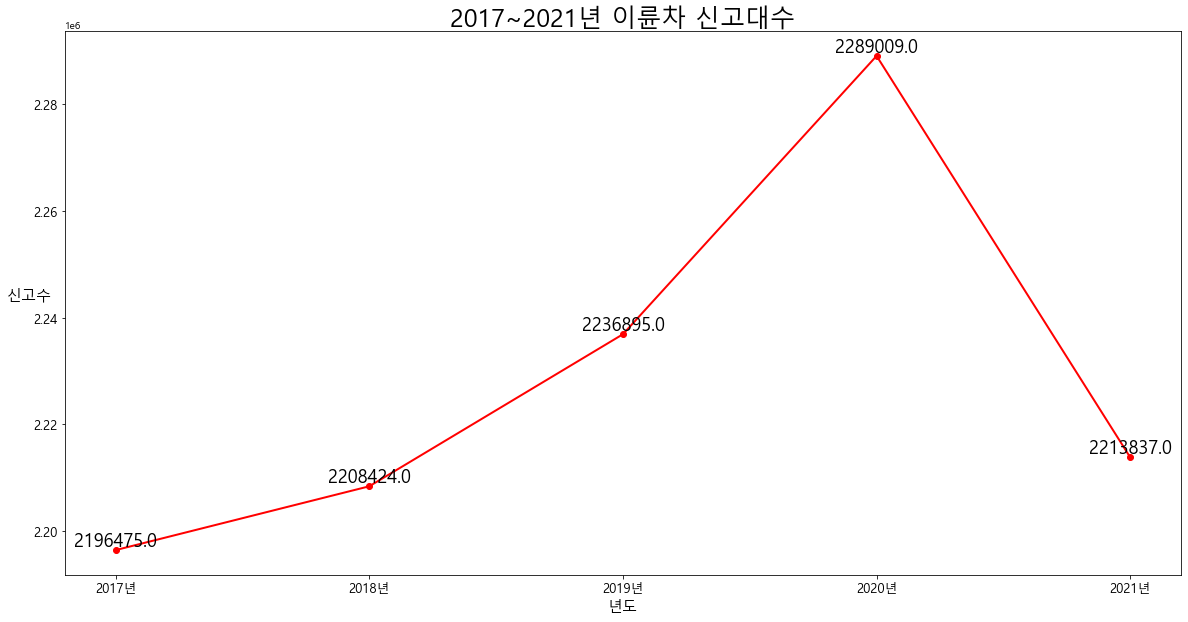

In [124]:
x = ['2017년','2018년', '2019년', '2020년', '2021년']
y = [2196475, 2208424, 2236895, 2289009, 2213837]

line_graph = plt.plot(x, y, 'o-', color = 'red')
plt.title('2017~2021년 이륜차 신고대수', fontsize = 25)
#plt.ylim(0, 22)
plt.xlabel('년도', fontsize = 15)
plt.ylabel('신고수',fontsize = 15, rotation = 0)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)


# 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
for i in range(len(x)):
    height = y[i]
    plt.text(x[i], height + 0.25, '%.1f' %height, ha='center', va='bottom', size = 18)

plt.show()

In [14]:
rider = pd.read_csv('./minidata/배달원(전처리).csv')
rider = rider.set_index('년도')

In [15]:
rider

,종사자수
년도,
2017,355000
2018,313000
2019,343000
2020,371000
2021,423000


In [17]:
count = pd.read_csv('./minidata/사고건수.csv')
count

,기준년도,2017,2018,2019,2020,2021
0,사고건수,18241.0,17611.0,20898.0,21258.0,20598.0
1,사망자수,564.0,537.0,498.0,525.0,459.0
2,부상자수,22082.0,21621.0,26514.0,27348.0,26617.0


In [ ]:
count = count.set_index('기준년도')
count = count.loc[['사고건수']]

In [23]:
count = count.T
count

기준년도,사고건수
2017,18241.0
2018,17611.0
2019,20898.0
2020,21258.0
2021,20598.0


In [27]:
count = count.reset_index(drop=True)
count

기준년도,사고건수
0,18241.0
1,17611.0
2,20898.0
3,21258.0
4,20598.0


In [28]:
rider = rider.reset_index(drop=True)
rider

,종사자수
0,355000
1,313000
2,343000
3,371000
4,423000


In [29]:
data = data.reset_index(drop=True)
data

,이륜차 신고 수
0,2196475
1,2208424
2,2236895
3,2289009
4,2213837


In [79]:
df = pd.concat([data,rider,count], axis=1)
df = df.rename(index={0:'2017',1:'2018',2:'2019',3:'2020',4:'2021'})
df

,이륜차 신고 수,종사자수,사고건수
2017,2196475,355000,18241.0
2018,2208424,313000,17611.0
2019,2236895,343000,20898.0
2020,2289009,371000,21258.0
2021,2213837,423000,20598.0


In [80]:
df_21 = df.drop('2017', axis=0)

In [81]:
df_21

,이륜차 신고 수,종사자수,사고건수
2018,2208424,313000,17611.0
2019,2236895,343000,20898.0
2020,2289009,371000,21258.0
2021,2213837,423000,20598.0


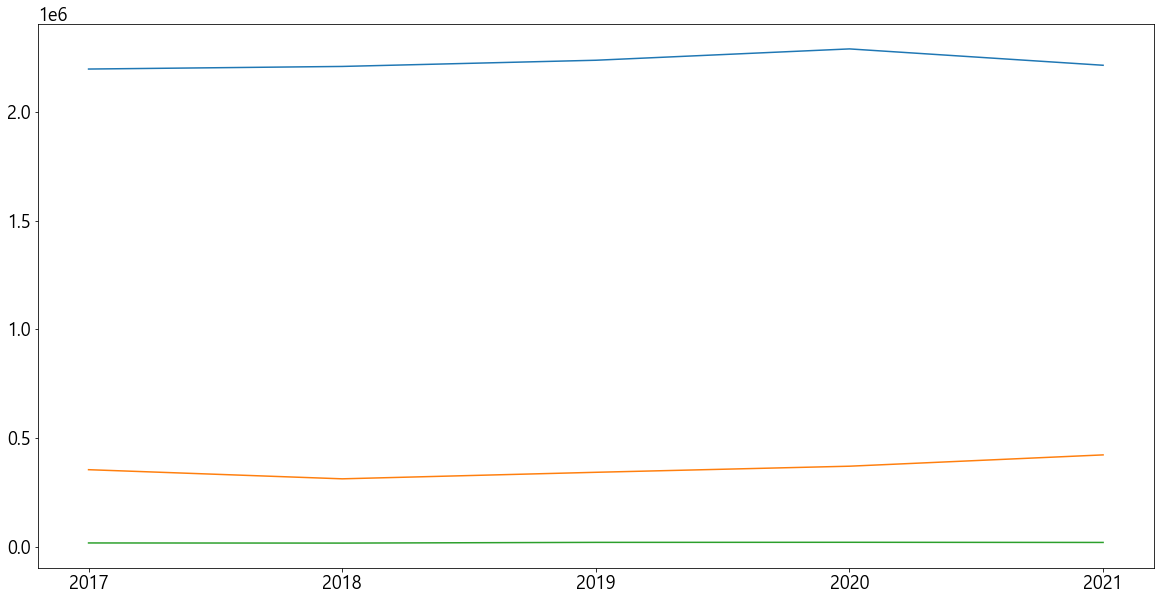

In [33]:
plt.plot(df)

(array([17000., 17500., 18000., 18500., 19000., 19500., 20000., 20500.,
        21000., 21500.]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

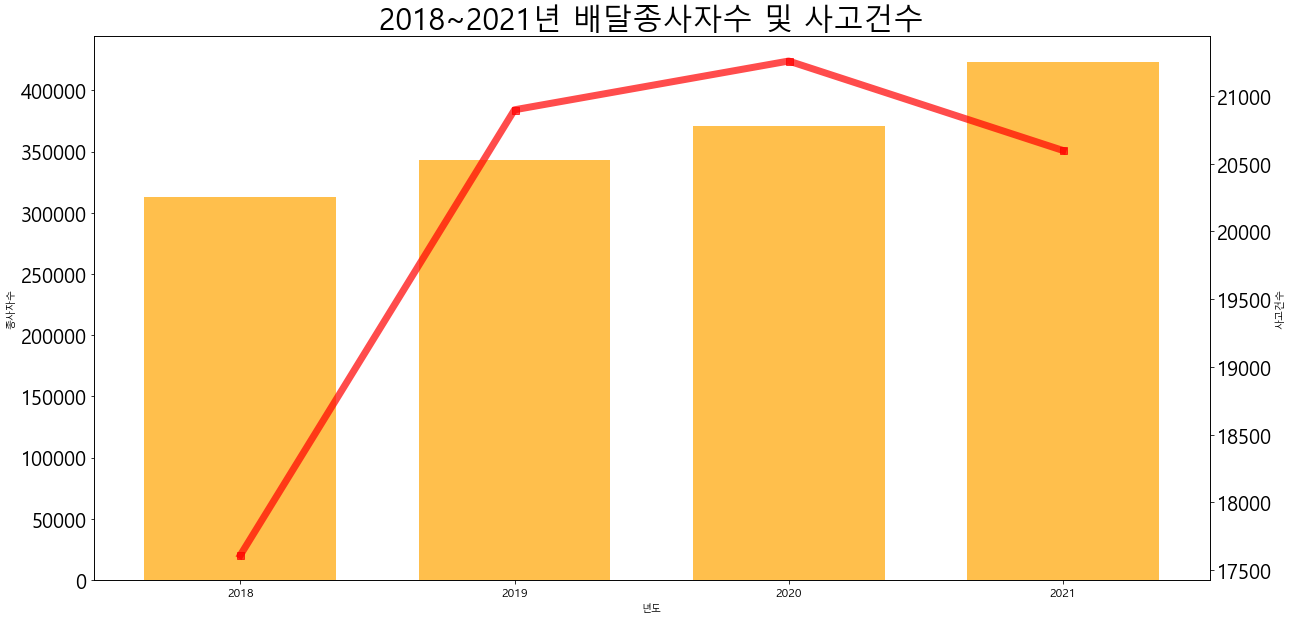

In [96]:
fig, ax1 = plt.subplots()
ax1.bar(df_21.index, df_21['종사자수'],color='orange', label='Demand', alpha=0.7, width=0.7)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 20)
plt.xlabel('년도')
plt.ylabel('종사자수')

# ax1.legend('사업체수',fontsize = 30)
plt.title('2018~2021년 배달종사자수 및 사고건수', fontsize= 30)

ax2 = ax1.twinx()
ax2.plot(df_21.index, df_21['사고건수'],'-s', color='red', markersize=7, linewidth=7, alpha=0.7)
plt.ylabel('사고건수')
plt.yticks(fontsize=20)

In [84]:
df_count = df_21[['종사자수','사고건수']]

C:\Users\admin\AppData\Local\Temp\ipykernel_4772\3206021148.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


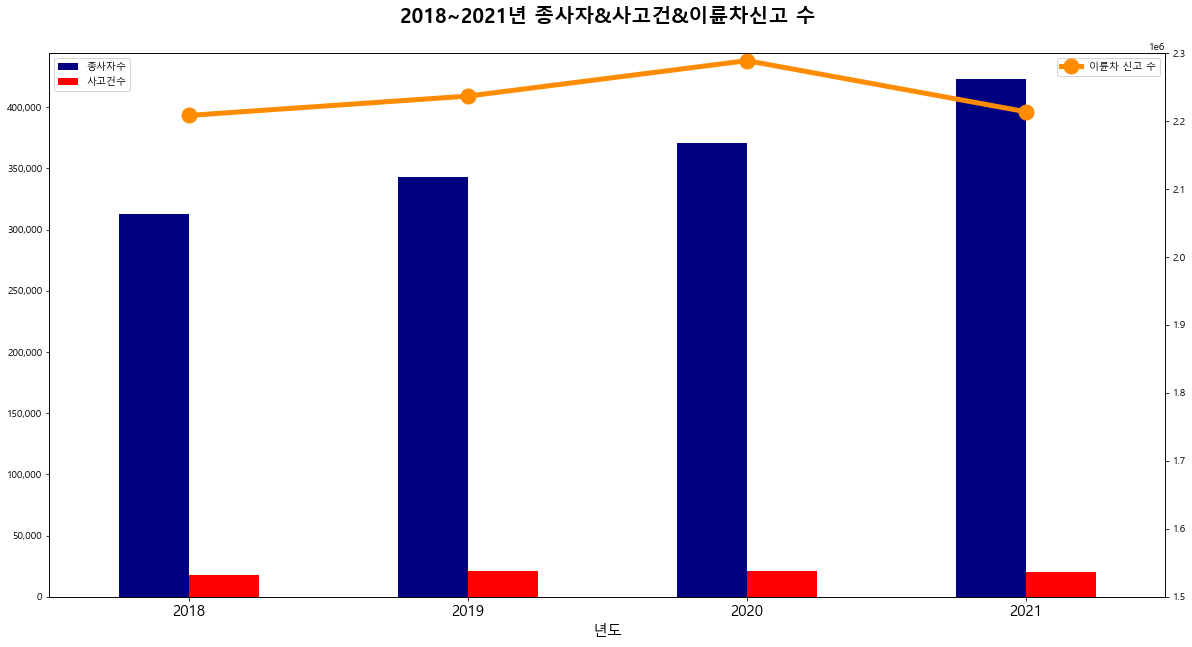

In [95]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20,10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

ax1 = df_count.plot.bar(stacked=False, color = ['navy','red'])

# x축
plt.xticks([i for i in range(0,4,1)], ['2018','2019','2020','2021'], rotation = 0, fontsize='15')
# plt.xticks(df.index)

# 천단위콤마
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

# title
plt.title("2018~2021년 종사자&사고건&이륜차신고 수", size = 20, weight = 'bold', pad = 30)
plt.xlabel("년도", fontsize='15')
plt.legend(loc="upper left")

# 범례 위치 변경하기
plt.legend(loc="upper left")

ax2 = ax1.twinx()
ax2 = df_21['이륜차 신고 수'].plot(color = 'darkorange', linewidth = 5, marker='o', markersize = 15)

#plt.ylabel("사망자 수")
# x축
plt.xticks([i for i in range(0,4,1)], ['2018','2019','2020','2021'], rotation = 0)

# plt.xticks(df.index)
# y축 범위
plt.ylim(1500000,2300000)



#범례 위치 변경하기
plt.legend(loc="upper right")

plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

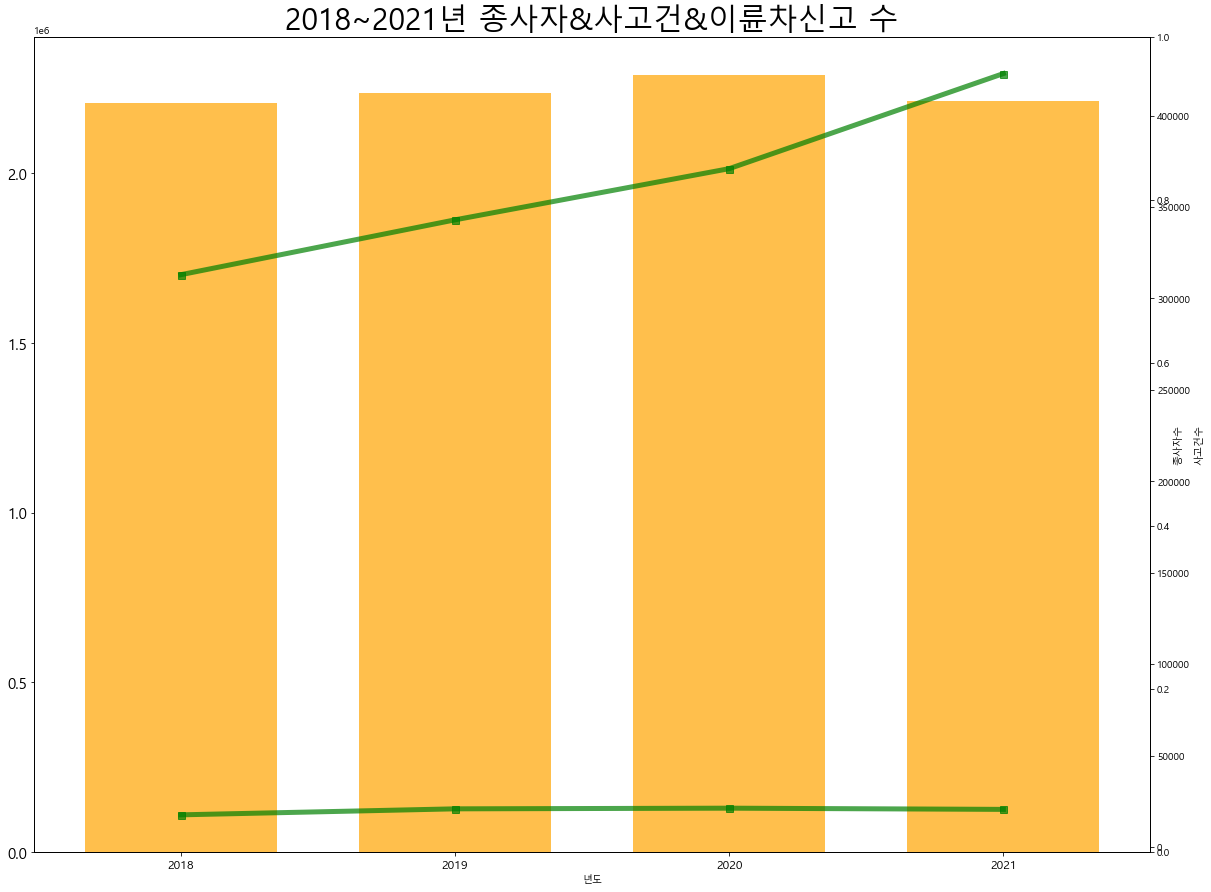

In [94]:
plt.rcParams['figure.figsize'] = (20, 15)
fig, ax1 = plt.subplots()
ax1.bar(df_21.index, df_21['이륜차 신고 수'],color='orange', label='Demand', alpha=0.7, width=0.7)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)
plt.xlabel('년도')

# ax1.legend('사업체수',fontsize = 30)
plt.title('2018~2021년 종사자&사고건&이륜차신고 수', fontsize= 30)

ax2 = ax1.twinx()
ax2.plot(df_21.index, df_21['사고건수'],'-s', color='green', markersize=7, linewidth=5, alpha=0.7)
plt.ylabel('사고건수')
plt.yticks(fontsize=10)

ax3 = ax1.twinx()
ax2.plot(df_21.index, df_21['종사자수'],'-s', color='green', markersize=7, linewidth=5, alpha=0.7)
plt.ylabel('종사자수')
plt.yticks(fontsize=10)

### 분석

In [99]:
print(df_21.corr())

          이륜차 신고 수      종사자수      사고건수
이륜차 신고 수  1.000000  0.088607  0.647723
종사자수      0.088607  1.000000  0.627932
사고건수      0.647723  0.627932  1.000000


In [103]:
df_21 = df_21.rename(columns = {'이륜차 신고 수':'이륜차신고수'})
df_21

,이륜차신고수,종사자수,사고건수
2018,2208424,313000,17611.0
2019,2236895,343000,20898.0
2020,2289009,371000,21258.0
2021,2213837,423000,20598.0


### 다항선형회귀(사용x)

In [105]:
### 모델 객체 생성 및 학습모델 생성하기

# 모델 생성에 사용할 라이브러리 불러들이기
import statsmodels.formula.api as smf

# 만족도와 상관관계가 높은 적절성 데이터를 사용하여
#  - 종속변수(y) = 만족도 사용
#  - 독립변수(x) = 적절성 및 친밀도 사용(여러 개 사용)
formulas = "사고건수 ~ 종사자수 + 이륜차신고수"

### 학습모델 생성하기
model = smf.ols(formula = formulas, data=df_21).fit()
print("model = \n", model)
print("---------------------------")

### 학습모델 결과 확인하기 : summary()
print("학습모델 결과 = \n", model.summary())
print("-------------------------------")

# print("지수값을 실수값으로 표현 : 7.29e-15 = {:.9f}".format(7.29e-15))
# print("-------------------------------")

# - R-squared : 결정계수(1에 까가울 수록 학습모델이 좋은 것임)
#   (결정계수는 예측을 얼마나 잘 할 수 있을까로 해설할 수도 있다.)
# - Adj. R-squared : 수정결정계수(1에 까가울 수록 학습모델이 좋은 것임) : 0.598
# - *** 독립변수가 많을 경우 R-squared과 Adj. R-squared의 차이가 클 경우 
#       독립변수 [이상치를 확인]해야한다. ***

# -  p-value : 독립변수 모두 < 0.05 => 모델은 유효하다.
#     --> 적절성 p-value : 0.000 < 0.005
#     --> 친밀도 p-value : 0.014 < 0.005
# - 적절성의 std err(표준 오차)
# - 적절성의 Intercept(y절편) : 0.6673
# -  coef(기울기) 
#    --> 적절성 : 0.685224
#    --> 친밀도 : 0.095926
# - 적정성의 Kurtosis : 3.992 => 일반적으로 3보다 클경우,
#   평균에 데이터가 몰려있다고 판단한다.
#   kurtosis() 첨도는 확률분포에서 분포의 [뾰족한 정도]를 나타내는 [척도]입니다. 
#   --> 첨도가 높은 경우: 데이터의 분포가 평균(혹은 중심)에 많이 몰려 있어 뾰족하다


### 위 학습결과(summary())의 내용의 데이터 추출해 보기.....

### y절편(b)과 기울기(a) 산출
# 회귀식 y = a * x + b
# y절편(Intercept) : 힌게 데이터 조회
# 기울기  : 사용된 독립변수의 갯수 만큼 조회됨

b, a1, a2 = model.params

print("y절편(b) = {} / 적절성 기울기(a1) = {} / 친밀도 기울기(a2) = {}"\
          .format(b, a1, a2))
print("-------------------------------")

### 결정계수(R-squared)
# - 단순 회귀분석의 결정계수 보다 조금 높게 나옴
rsquared = model.rsquared
print("결정계수(R-squared) = ", rsquared) 
print("-------------------------------")

### 유의수준(p-value)
print("유의수준(p-value) = {:.3f}".format(model.pvalues[0]))

### (해석)
# - 생성한 학습모델에 사용된 독립변수는
# - 유의수준 p-value는 모든 독립변수 < 0.05 으로 유의미 하다.
# - 결정계수(R-squared) 0.598 > 0.05  => 의미있는 학습모델
# - 하지만, 예측 시에 정확도가 다소 낮을 수 있다.

model = 
---------------------------
학습모델 결과 = 
                             OLS Regression Results                            
Dep. Variable:                   사고건수   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     1.481
Date:                Wed, 27 Jul 2022   Prob (F-statistic):              0.502
Time:                        11:58:29   Log-Likelihood:                -32.042
No. Observations:                   4   AIC:                             70.08
Df Residuals:                       1   BIC:                             68.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### 종사자수 신고대수 사고건수 상관관계

In [106]:
import seaborn as sns

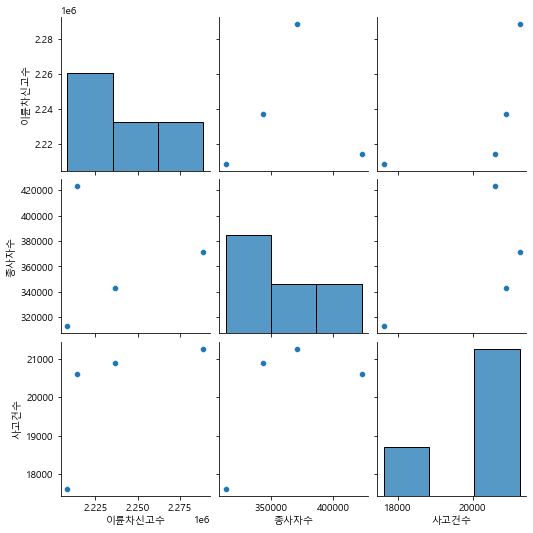

In [107]:
sns.pairplot(df_21)

### 신고대수&사고건수

In [126]:
use = df_21[['이륜차신고수','사고건수']]
use

,이륜차신고수,사고건수
2018,2208424,17611.0
2019,2236895,20898.0
2020,2289009,21258.0
2021,2213837,20598.0


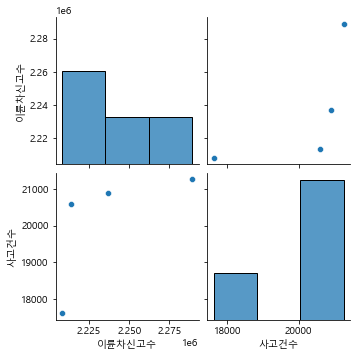

In [127]:
sns.pairplot(use)

In [130]:
from scipy import stats
# 전/후 검증하기
result = stats.ttest_rel(use['이륜차신고수'], use['사고건수'])
print('검정 결과 =', result)
print('검정 통계량 = %.3f, p-value = %.3f' %(result))

#(해석)
# 1. p-value 0.000 < 0.05 귀무가설 기각
# 2. 대립가설 채택 : 이륜차신고수와 사고건수 관계있다.

검정 결과 = Ttest_relResult(statistic=124.14151971761909, pvalue=1.1524394917440526e-06)
검정 통계량 = 124.142, p-value = 0.000


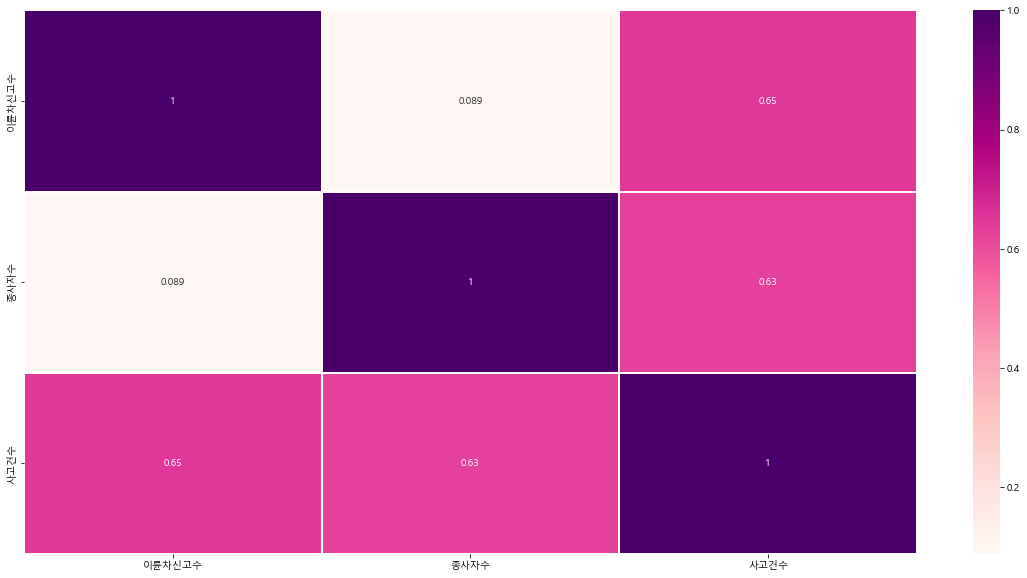

In [138]:
data2 = df_21[["이륜차신고수","종사자수", "사고건수"]]
sns.heatmap(data2.corr(), annot=True, cmap='RdPu', linewidth=0.1)
plt.show()

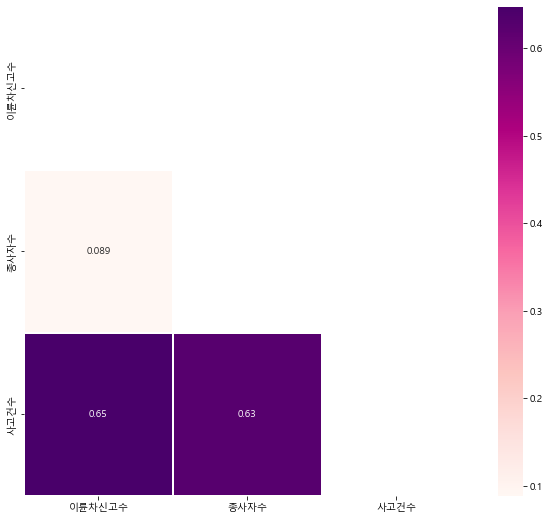

In [137]:
fig, ax = plt.subplots(1,1, figsize=(10,9))

mask = np.zeros_like(df_21.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_21.corr(), annot=True, cmap='RdPu', linewidth=0.1, mask=mask)
plt.show()